In [240]:
'''PREPROCESSING'''

'PREPROCESSING'

In [201]:
# 1. (2 points) Often there are outliers which do not match the overall
# data type. There is one record in this data where the “Reviews” has
# value “3.0M” which does not match the rest of the data. Remove that
# Record.

import pandas as pd

my_data_frame = pd.read_excel('GooglePlaystore.xlsx')

#Checking if M string exits in column
print(my_data_frame['Reviews'].str.contains("M").any())


#Printing data frame tuple before the removal
print("Before Removal: ",my_data_frame.shape)

index_list = []
substring = "M"
counter = 0


#If it exists then getting the row index to be removed 
for i in my_data_frame['Reviews']:
    if substring in str(i):
        index_list.append(counter)
    counter += 1

for i in index_list:
    my_data_frame = my_data_frame.drop(my_data_frame.index[i])


#Printing data frame after the removal
print("After Removal: ",my_data_frame.shape)


True
Before Removal:  (10841, 13)
After Removal:  (10840, 13)


In [202]:
# 2. (2 points) Remove rows where any of the columns has the value “Varies
# with device”.

header_list = ["App","Category","Rating","Reviews","Size","Installs","Type","Price","Content Rating","Genres","Last Updated","Current Ver","Android Ver"]

index_list = []
substring = "Varies with device"
counter = 0

#Printing data frame tuple before the removal
print("Before Removal: ",my_data_frame.shape)

#If it exists then getting the row index to be removed
for header in header_list:
    for i in my_data_frame[header]:
        if substring in str(i):
            index_list.append(counter)
        counter += 1

    my_data_frame = my_data_frame.drop(my_data_frame.index[index_list])
    index_list.clear()
    counter = 0

#Printing data frame after the removal
print("After Removal: ",my_data_frame.shape)


Before Removal:  (10840, 13)
After Removal:  (9059, 13)


In [203]:
# 3. (2 points) The values in the Android version column should be floats.
# Strip the trailing non-numeric characters from all values (ie. the words
# “ and up”), so the result is a number. If there are multiple decimal
# places (eg. “x.y.z”), keep only the first two parts (eg “x.y”). For
# example, the value “4.1 and up” should be changed to “4.1”. The
# value “4.5.6 and up” should be changed to “4.5”. The value “5.6.7”
# should be changed to “5.6”.
# If there is a range (eg. 5.0 – 8.0), only consider the first number. For
# example, the value “5.0 – 8.0” should be changed to “5.0”. The value
# “4.0.3 – 7.1.1” should be changed to “4.0”.


substring = "and up"
substring1= "-"
counter = 0


for i in my_data_frame['Android Ver']:
    value = str(i)
    new_substring = value
    if substring in value or  substring1 in value or len(value) == 5:
        new_substring = value[0:3]
    my_data_frame.iloc[[counter],[12]] = new_substring
    counter += 1

print(my_data_frame['Android Ver'])


0        4.0
1        4.0
2        4.0
4        4.4
5        2.3
        ... 
10834    4.1
10835    4.0
10836    4.1
10837    4.1
10838    2.2
Name: Android Ver, Length: 9059, dtype: object


In [204]:
# 4. (3 points) The “Installs” column must have integer values. For values
# that have commas, remove the commas. For values that have a ‘+’ at
# the end, remove the ‘+’. Keep only those rows that have an integer
# value after these edits.

counter = 0
new_substring = ""
index_list = []

#Printing data frame tuple before the removal
print("Before Removal: ",my_data_frame.shape)

for i in my_data_frame['Installs']:
    new_substring = str(i).replace(",","")
    if new_substring[len(new_substring)-1] == '+':
        new_substring = new_substring.replace("+","")

    if new_substring == "NaN":
        index_list.append(counter)
    my_data_frame.iloc[[counter],[5]] = new_substring
    new_substring = ""
    counter += 1


my_data_frame = my_data_frame.drop(my_data_frame.index[index_list])

#Printing data frame after the removal
print("After Removal: ",my_data_frame.shape)
print(my_data_frame['Installs'])

Before Removal:  (9059, 13)
After Removal:  (9059, 13)
0          10000
1         500000
2        5000000
4         100000
5          50000
          ...   
10834        500
10835         10
10836       5000
10837        100
10838       1000
Name: Installs, Length: 9059, dtype: object


In [205]:
# 5. (3 points) For missing rating values, if the number of reviews is less
# than 100 and installations is less than 50000, remove the row. Else, fill
# the missing value with the average value (rounded to 2 decimal places)
# for the Category of that row


#Checking if column has any null vlaue
print(my_data_frame['Reviews'].isnull().any())

average_rating = round(my_data_frame['Rating'].mean(),2)


counter = 0
new_substring = ""
index_list = []

#Printing data frame tuple before the removal
print("Before Removal: ",my_data_frame.shape)

for i in my_data_frame['Rating']:
    new_substring = str(i)
    if new_substring == "nan":
        if counter < my_data_frame.shape[0]:
            review_value = int(my_data_frame.iloc[counter]['Reviews'])
            install_value = int(my_data_frame.iloc[counter]['Installs'])
            if review_value < 100 and install_value < 50000:
                index_list.append(counter)
            else:
                 my_data_frame.iloc[[counter],[2]] = average_rating
    counter += 1


my_data_frame = my_data_frame.drop(my_data_frame.index[index_list])

#Printing data frame after the removal
print("After Removal: ",my_data_frame.shape)
print(my_data_frame['Rating'])

False
Before Removal:  (9059, 13)
After Removal:  (7685, 13)
0        4.1
1        3.9
2        4.7
4        4.3
5        4.4
        ... 
10832    3.8
10833    4.8
10834    4.0
10836    4.5
10837    5.0
Name: Rating, Length: 7685, dtype: float64


In [211]:
#6. (3 points) In Size column, convert “M” (millions) and “K” (thousands)
# values into integers. For instance, 8.7M should be converted to 8700000
# and 2.4K should be converted to 2400.


counter = 0
new_substring = ""

for i in my_data_frame['Size']:
    value = str(i)
    integer_value = float(value[0:2])
    symbol = value[len(value)-1]
    
    if symbol == "M":
        new_substring = str(integer_value * 1000000)
    elif symbol == "K":
        new_substring = str(integer_value * 1000)
    my_data_frame.iloc[[counter],[4]] = new_substring
    counter += 1
    new_substring = ""

print(my_data_frame['Size'])


19000000.0
14000000.0
8000000.0
2000000.0
5000000.0
19000000.0
29000000.0
33000000.0
3000000.0
28000000.0
12000000.0
20000000.0
21000000.0
37000000.0
2000000.0
5000000.0
17000000.0
39000000.0
31000000.0
14000000.0
12000000.0
4000000.0
7000000.0
23000000.0
6000000.0
25000000.0
6000000.0
4000000.0
4000000.0
9000000.0
5000000.0
11000000.0
11000000.0
4000000.0
9000000.0
24000000.0
11000000.0
9000000.0
15000000.0
10000000.0
1000000.0
12000000.0
24000000.0
26000000.0
8000000.0
7000000.0
25000000.0
56000000.0
57000000.0
35000000.0
33000000.0
33000000.0
5000000.0
54000000.0

3000000.0
5000000.0
17000000.0
8000000.0
2000000.0
27000000.0
2000000.0
2000000.0
7000000.0
35000000.0
16000000.0
17000000.0
3000000.0
8000000.0
3000000.0
2000000.0
38000000.0
32000000.0
37000000.0
15000000.0
5000000.0
18000000.0
38000000.0
1000000.0
7000000.0
35000000.0
17000000.0
19000000.0
14000000.0
2000000.0
4000000.0
17000000.0
14000000.0
9000000.0
21000000.0
52000000.0
14000000.0
25000000.0
9000000.0
12000000.0
3500

In [241]:
'''ANALYSIS'''

'ANALYSIS'

In [225]:
# 1. (2 points) Describe (use DataFrame describe method) the category-wise rating statistics. 
# In other words, for each category, describe the
# statistics (count, mean, etc.) for ratings in that category.

category_list = []
category_list_dataframe = []
header_list = ["App","Category","Rating","Reviews","Size","Installs","Type","Price","Content Rating","Genres","Last Updated","Current Ver","Android Ver"]


counter = 0
new_substring = ""

for i in my_data_frame['Category']:
    value = str(i)
    #Extracting each category
    if value not in category_list:
        category_list.append(value)
        category_list_dataframe.append(pd.DataFrame(columns = header_list))

for i in my_data_frame['Category']:
    value = str(i)
    #Getting row data according to each category so that we could use describe() on them later
    if value in category_list:
        new_dataframe = category_list_dataframe[category_list.index(value)]
        new_dataframe.loc[len(new_dataframe.index)] = my_data_frame.iloc[counter]
        category_list_dataframe[category_list.index(value)] = new_dataframe
    counter += 1

counter = 0
#Printing each category wise 
for category_wise_dataframes in category_list_dataframe:
    print("CATEGORY: ",category_list[counter])
    print(category_wise_dataframes.describe(datetime_is_numeric=True))
    print()
    counter += 1





CATEGORY:  ART_AND_DESIGN
                        Last Updated
count                             59
mean   2018-04-08 13:49:49.830508544
min              2017-03-26 00:00:00
25%              2018-01-11 00:00:00
50%              2018-04-26 00:00:00
75%              2018-07-15 12:00:00
max              2018-08-04 00:00:00

CATEGORY:  AUTO_AND_VEHICLES
                        Last Updated
count                             62
mean   2018-04-06 01:56:07.741935360
min              2014-08-26 00:00:00
25%              2018-04-02 06:00:00
50%              2018-07-03 00:00:00
75%              2018-07-27 00:00:00
max              2018-08-02 00:00:00

CATEGORY:  BEAUTY
              Last Updated
count                   40
mean   2018-04-16 08:24:00
min    2017-03-01 00:00:00
25%    2018-03-20 06:00:00
50%    2018-05-28 12:00:00
75%    2018-07-13 06:00:00
max    2018-08-06 00:00:00

CATEGORY:  BOOKS_AND_REFERENCE
                        Last Updated
count                            147
mean   2017

In [235]:
# 3. (3 points) Find the average, maximum and minimum price of the paid
# Applications.




counter = 0
new_substring = ""
index_list = []
average = 0
min_value = 0
max_value = 0
my_sum = 0
entry_count = 0

for i in my_data_frame['Type']:
    new_substring = str(i)
    if new_substring == "Paid":
        price = float(my_data_frame.iloc[counter]['Price'])
        entry_count += 1
        if counter != 0:
            my_sum += price
            if price > max_value:
                max_value = price
            elif price <= min_value:
                min_value = price
        else:
            min_value = price
            max_value = price
            my_sum += price
          
    counter += 1

print("```````````Paid Apps Details```````````````````")
print("Average: $%s" % round((my_sum/entry_count),2))
print("Min Value: $%s" % min_value)
print("Max Value: $%s" % max_value)



```````````Paid Apps Details```````````````````
Average: $15.14
Min Value: $0
Max Value: $400.0


In [239]:
'''VISUALIZATION'''

'VISUALIZATION'

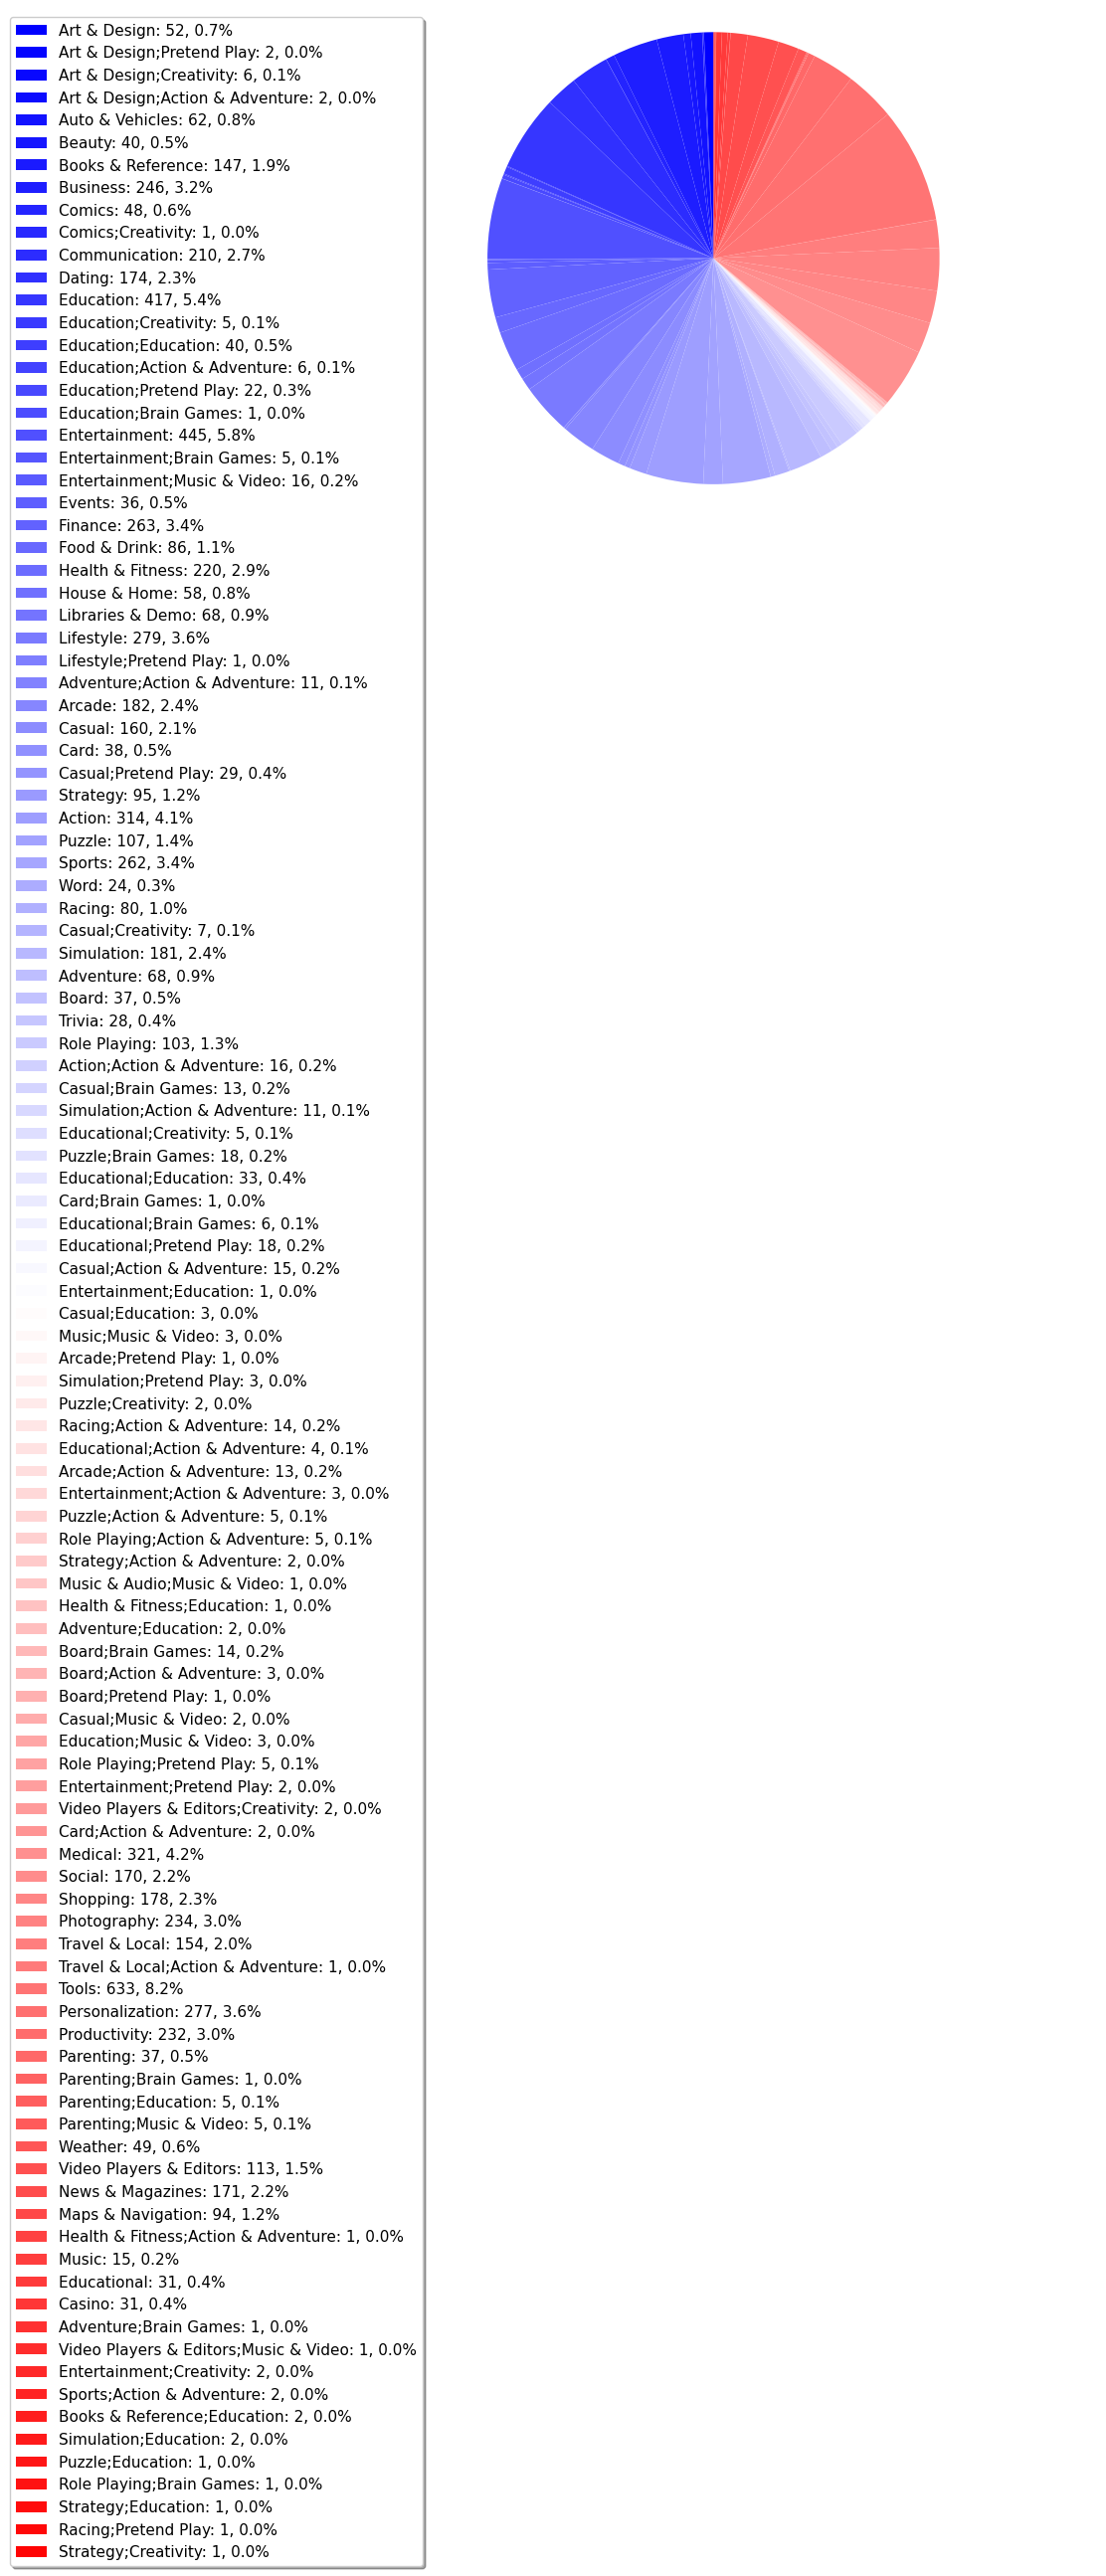

In [261]:
# 1. (5 points) In the genre column, break the string of genres into a list.
# For example, ‘Art & Design; Creativity’ should be [‘Art & Design’,
# ‘Creativity’].
# Count the number of applications per genre and display it using a pie
# chart.
# Hint: See DataFrame.explode()

import matplotlib.pyplot as plt


genres_list = []
genres_list_count = []
value = ""
new_value = ""

for i in my_data_frame['Genres']:
    value = str(i)
    if "," in value:
        new_value = value.split(",")
    else:
        new_value = value
    
    if type(new_value) == list:
        for j in new_value:
            #Extracting each genre
            if j not in genres_list:
                genres_list.append(j)
    else:    
        #Extracting each genre
        if new_value not in genres_list:
            genres_list.append(new_value)


for i in range(0,len(genres_list)):
    genres_list_count.append(0)


for i in my_data_frame['Genres']:
    value = str(i)

    if "," in value:
        new_value = value.split(",")
    else:
        new_value = value
    
    if type(new_value) == list:
        for j in new_value:
            #Extracting each genre
            if j in genres_list:
                new_count = genres_list_count[genres_list.index(j)]
                new_count += 1
                genres_list_count[genres_list.index(j)] = new_count
    else:    
        #Extracting each genre
        if new_value in genres_list:
            new_count = genres_list_count[genres_list.index(new_value)]
            new_count += 1
            genres_list_count[genres_list.index(new_value)] = new_count


labels = []
count  = 0 
for i in genres_list:
    new_string = genres_list[count] + ": " + str(genres_list_count[count])
    labels.append(new_string)
    count += 1

# labels = ["%s: %s" % j,i for i in genres_list_count, for j in genres_list]

fig1, ax1 = plt.subplots(figsize=(11, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(genres_list_count)) for i in range(len(genres_list_count))])

_, _ = ax1.pie(genres_list_count, startangle=90)

ax1.axis('equal')

total = sum(genres_list_count)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, genres_list_count)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure,
    shadow = True
    
)

plt.show()



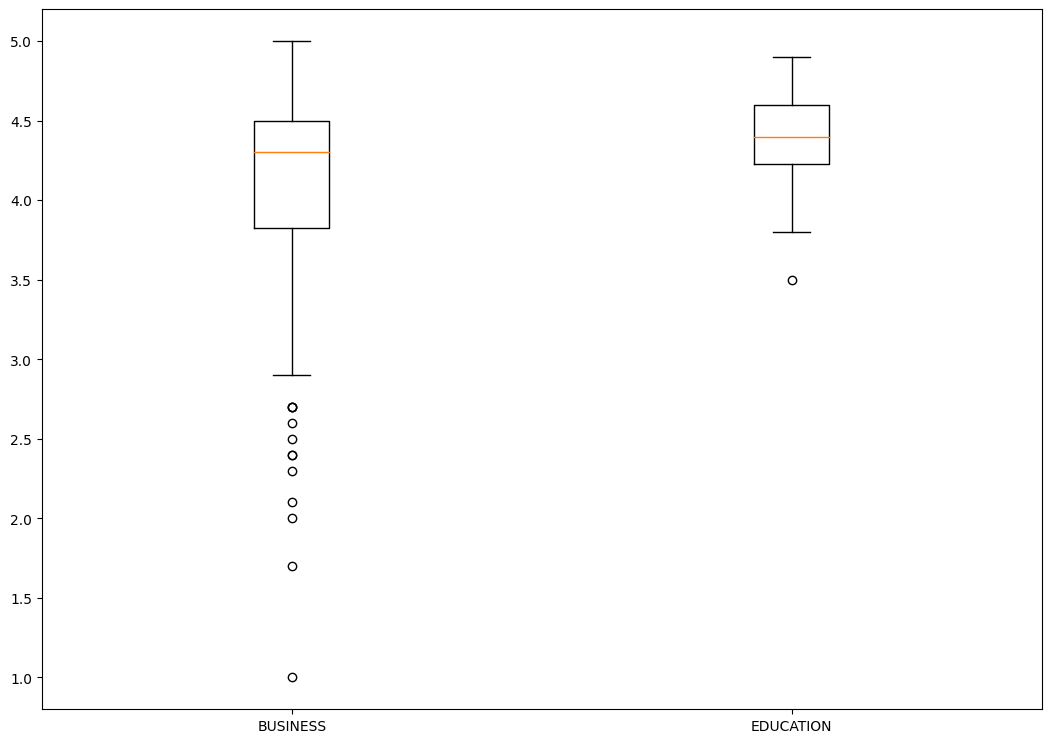

In [271]:
# 2. (5 points) Display a box plot of ratings for “Business” and “Education”
# categories. The boxplots should be in the same plot
import matplotlib.pyplot as plt

category_list = []
category_list_dataframe = []
header_list = ["App","Category","Rating","Reviews","Size","Installs","Type","Price","Content Rating","Genres","Last Updated","Current Ver","Android Ver"]


counter = 0
new_substring = ""

for i in my_data_frame['Category']:
    value = str(i)
    #Extracting each category
    if value not in category_list:
        category_list.append(value)
        category_list_dataframe.append(pd.DataFrame(columns = header_list))

for i in my_data_frame['Category']:
    value = str(i)
    #Getting row data according to each category so that we could use describe() on them later
    if value in category_list:
        new_dataframe = category_list_dataframe[category_list.index(value)]
        new_dataframe.loc[len(new_dataframe.index)] = my_data_frame.iloc[counter]
        category_list_dataframe[category_list.index(value)] = new_dataframe
    counter += 1

counter = 0
business_ratings_list = []
education_ratings_list = []
#Printing each category wise 
for category_wise_dataframes in category_list_dataframe:
    if category_list[counter] == "BUSINESS":
        business_ratings_list = category_wise_dataframes["Rating"]
    elif category_list[counter] == "EDUCATION":
        education_ratings_list = category_wise_dataframes["Rating"]
    counter += 1


data = [business_ratings_list, education_ratings_list]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

ax.set_xticklabels(["BUSINESS","EDUCATION"])
 
# show plot
plt.show()